In [6]:
import pandas as pd
from elasticsearch import Elasticsearch

In [126]:
elasticsearch: Elasticsearch = Elasticsearch(hosts=[{"host": "0.0.0.0", "port": 9200}])

In [185]:
def get_nbr_job_offers_by_techno_and_by_job_name(job_name: str, techno_name):
    return elasticsearch.search(
        index="job_offers",
        body={
            "query": {
                "bool": {"must": {"match": {"skills": techno_name}}, "filter": {"term": {"keyword.keyword": job_name}}}
            }
        },
    )["hits"]["total"]["value"]

In [186]:
techno_names = ["aws", "gcp", "azure", "python", "bash", "java", "scala", "R", "terraform", "ansible", "machine learning"
                ,"deep learning"]
jobs = ["data scientist", "data engineer", "devops"]

In [187]:
resul_df = pd.DataFrame()

In [188]:

for job_name in jobs:
    for techno in techno_names:
        nbr_jobs_found = get_nbr_job_offers_by_techno_and_by_job_name(job_name, techno)
        resul_df = resul_df.append({"job_name": job_name, "techno_name": techno, "nbr_jobs_found": nbr_jobs_found},ignore_index=True)


In [203]:
resul_df.sample(10)

job_name  nbr_jobs_found    techno_name
30          devops            14.0          scala
6   data scientist            55.0          scala
3   data scientist           607.0         python
26          devops           191.0          azure
29          devops           241.0           java
8   data scientist             0.0      terraform
33          devops           312.0        ansible
17   data engineer           226.0           java
23   data engineer           188.0  deep learning
18   data engineer            84.0          scala

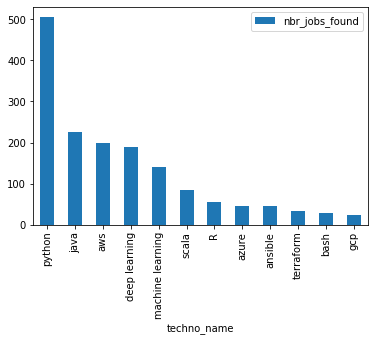

In [200]:
result_data_engineer = resul_df[resul_df["job_name"]=="data engineer"]
result_data_engineer =result_data_engineer.sort_values(by="nbr_jobs_found",ascending=False)
result_data_engineer.plot.bar(y="nbr_jobs_found", x="techno_name")


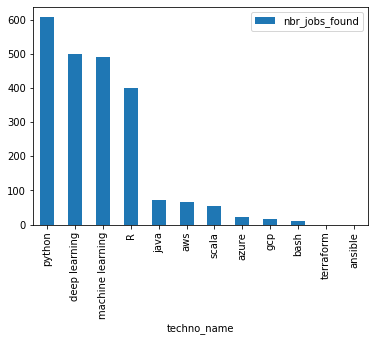

In [201]:
result_data_scientist = resul_df[resul_df["job_name"]=="data scientist"]
result_data_scientist = result_data_scientist.sort_values(by="nbr_jobs_found",ascending=False)
result_data_scientist.plot.bar(y="nbr_jobs_found", x="techno_name")

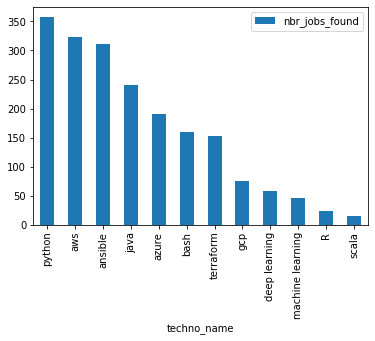

In [202]:
result_devops = resul_df[resul_df["job_name"]=="devops"]
result_devops = result_devops.sort_values(by="nbr_jobs_found",ascending=False)
result_devops.plot.bar(y="nbr_jobs_found", x="techno_name")